# **Forecasting using Facebook Prophet-time-series model.**

Performing forecasting on covid19 confirmed cases using previous data of confirmed cases.

Steps Followed:

1.Data Preprocessing.

2.Data visualization of previous data available.

3.Data preparation for Forecasting.

4.Forecasting for coming months.

## Data Preprocessing:

In [1]:
#import required libaries for data preprocessing.
import pandas as pd

In [2]:
coviddata=pd.read_csv('/content/case_time_series.csv')
coviddata

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...
498,11 June 2021,2021-06-11,84574,29358334,122685,27903079,3996,366516
499,12 June 2021,2021-06-12,80525,29438859,132664,28035743,3300,369816
500,13 June 2021,2021-06-13,71001,29509860,119574,28155317,3922,373738
501,14 June 2021,2021-06-14,60008,29569868,117376,28272693,2733,376471


In [3]:
coviddata.shape

(503, 8)

In [4]:
coviddata.columns

Index(['Date', 'Date_YMD', 'Daily Confirmed', 'Total Confirmed',
       'Daily Recovered', 'Total Recovered', 'Daily Deceased',
       'Total Deceased'],
      dtype='object')

In [5]:
coviddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             503 non-null    object
 1   Date_YMD         503 non-null    object
 2   Daily Confirmed  503 non-null    int64 
 3   Total Confirmed  503 non-null    int64 
 4   Daily Recovered  503 non-null    int64 
 5   Total Recovered  503 non-null    int64 
 6   Daily Deceased   503 non-null    int64 
 7   Total Deceased   503 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 31.6+ KB


In [6]:
#just to check for any null values.
coviddata.isnull().sum()

Date               0
Date_YMD           0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

In [7]:
coviddata.isnull().sum().sum()

0

## Data Visualization:

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

[]

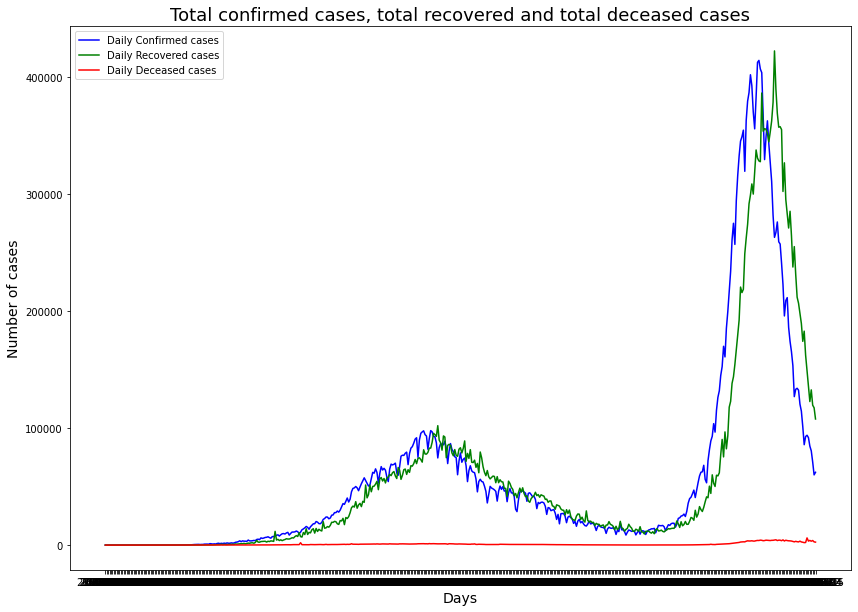

In [9]:
x=coviddata['Date_YMD']
y1=coviddata['Daily Confirmed']
y2=coviddata['Daily Recovered']
y3=coviddata['Daily Deceased']
plt.figure(figsize=(14,10))
plt.plot(x,y1,label='Daily Confirmed cases',color='blue')
plt.plot(x,y2,label='Daily Recovered cases',color='green')
plt.plot(x,y3,label='Daily Deceased cases',color='red')
plt.title('Total confirmed cases, total recovered and total deceased cases',fontsize=18)
plt.xlabel('Days',fontsize=14)
plt.ylabel('Number of cases',fontsize=14)
plt.legend()
plt.plot()

[]

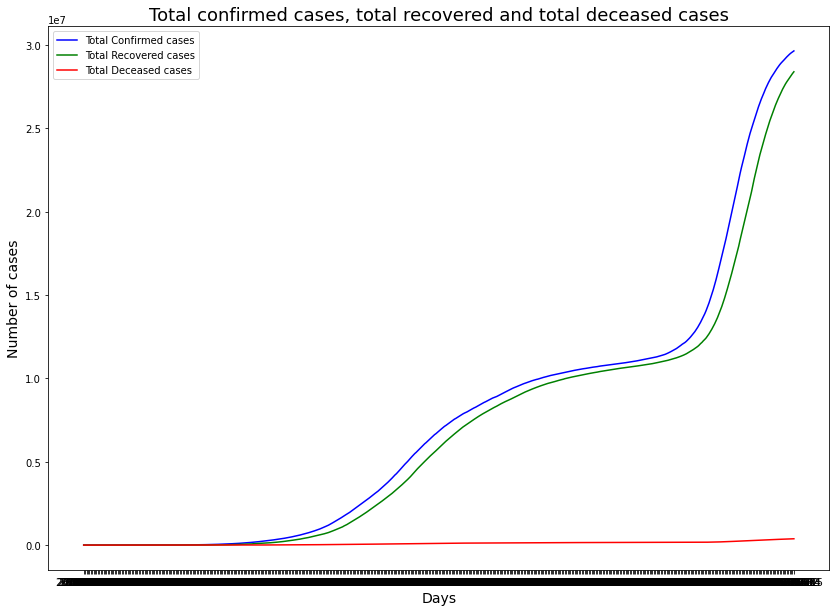

In [10]:
x=coviddata['Date_YMD']
y1=coviddata['Total Confirmed']
y2=coviddata['Total Recovered']
y3=coviddata['Total Deceased']
plt.figure(figsize=(14,10))
plt.plot(x,y1,label='Total Confirmed cases',color='blue')
plt.plot(x,y2,label='Total Recovered cases',color='green')
plt.plot(x,y3,label='Total Deceased cases',color='red')
plt.title('Total confirmed cases, total recovered and total deceased cases',fontsize=18)
plt.xlabel('Days',fontsize=14)
plt.ylabel('Number of cases',fontsize=14)
plt.legend()
plt.plot()

 Understanding from above visualizations:
 
Number of recovered cases are high as compared to deceased cases, which shows that recovery rate for covid19 cases in India is very good.

## Data Preparation for forecasting

In [11]:
#Since we're forecasting for daily cases, we'll drop all other columns and keep needed ones. 
data=coviddata.drop(['Date','Total Confirmed','Daily Recovered', 'Total Recovered', 'Daily Deceased','Total Deceased'],axis=1)
data

,Date_YMD,Daily Confirmed
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,1
4,2020-02-03,1
...,...,...
498,2021-06-11,84574
499,2021-06-12,80525
500,2021-06-13,71001
501,2021-06-14,60008


Text(0, 0.5, 'Number of cases')

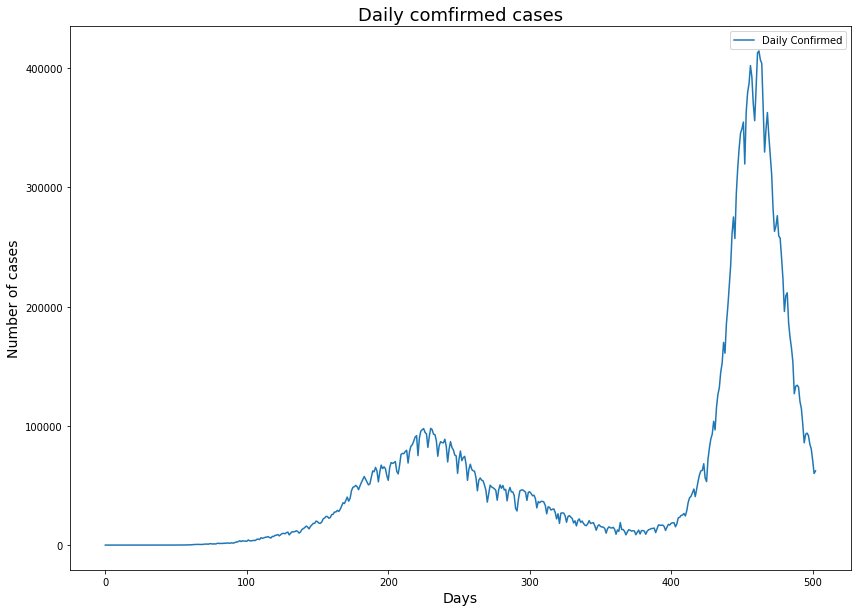

In [12]:
#plotting the prepared data.
data.plot(figsize=(14,10))
plt.title('Daily comfirmed cases',fontsize=18)
plt.xlabel('Days',fontsize=14)
plt.ylabel('Number of cases',fontsize=14)

## Forecasting

### Fit Prophet model 

In [13]:
# prepare expected column names.
from pandas import to_datetime
data.columns = ['ds', 'y']
data['ds']= to_datetime(data['ds'])

In [14]:
import fbprophet
from fbprophet import Prophet
# define the model
model = Prophet(interval_width=0.95,daily_seasonality=True,weekly_seasonality=True,yearly_seasonality=True)
# fit the model
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


## Forecasting

In [15]:
# define the period for which we want a prediction, here I'm trying to make forecasting till year end i.e. December 2021.
future = list()
for i in range(6, 13):
	date = '2021-%02d' % i
	future.append([date])
future =pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [16]:
# use the model to make a forecast
forecast = model.predict(future)

## View forecast

In [17]:
#view first 5 rows of forecast.
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-06-01,74422.100518,103036.516280,237867.837889,74422.100518,74422.100518,98809.612832,98809.612832,98809.612832,106242.71294,106242.71294,106242.71294,-1941.304666,-1941.304666,-1941.304666,-5491.795442,-5491.795442,-5491.795442,0.0,0.0,0.0,173231.713350
1,2021-07-01,92458.076239,182026.910839,311252.340538,89678.282869,94690.566293,153938.277711,153938.277711,153938.277711,106242.71294,106242.71294,106242.71294,2458.210934,2458.210934,2458.210934,45237.353837,45237.353837,45237.353837,0.0,0.0,0.0,246396.353950
2,2021-08-01,111095.251150,206501.311298,345377.839077,99193.778778,124100.451982,161536.449435,161536.449435,161536.449435,106242.71294,106242.71294,106242.71294,-617.457758,-617.457758,-617.457758,55911.194252,55911.194252,55911.194252,0.0,0.0,0.0,272631.700585
3,2021-09-01,129732.426062,230321.723874,372595.512209,103002.469868,159947.093849,171378.661933,171378.661933,171378.661933,106242.71294,106242.71294,106242.71294,3305.599999,3305.599999,3305.599999,61830.348994,61830.348994,61830.348994,0.0,0.0,0.0,301111.087995
4,2021-10-01,147768.401783,225293.531818,377234.076358,104701.337433,194696.556568,151281.624416,151281.624416,151281.624416,106242.71294,106242.71294,106242.71294,2461.189671,2461.189671,2461.189671,42577.721805,42577.721805,42577.721805,0.0,0.0,0.0,299050.026199


In [18]:
#view last 5 rows of forecast.
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2,2021-08-01,111095.251150,206501.311298,345377.839077,99193.778778,124100.451982,161536.449435,161536.449435,161536.449435,106242.71294,106242.71294,106242.71294,-617.457758,-617.457758,-617.457758,55911.194252,55911.194252,55911.194252,0.0,0.0,0.0,272631.700585
3,2021-09-01,129732.426062,230321.723874,372595.512209,103002.469868,159947.093849,171378.661933,171378.661933,171378.661933,106242.71294,106242.71294,106242.71294,3305.599999,3305.599999,3305.599999,61830.348994,61830.348994,61830.348994,0.0,0.0,0.0,301111.087995
4,2021-10-01,147768.401783,225293.531818,377234.076358,104701.337433,194696.556568,151281.624416,151281.624416,151281.624416,106242.71294,106242.71294,106242.71294,2461.189671,2461.189671,2461.189671,42577.721805,42577.721805,42577.721805,0.0,0.0,0.0,299050.026199
5,2021-11-01,166405.576695,168028.068504,351646.490459,103933.613245,234499.821648,90592.134206,90592.134206,90592.134206,106242.71294,106242.71294,106242.71294,-7555.335132,-7555.335132,-7555.335132,-8095.243602,-8095.243602,-8095.243602,0.0,0.0,0.0,256997.710901
6,2021-12-01,184441.552416,157025.106458,375414.464101,102016.119323,273450.688978,77558.091528,77558.091528,77558.091528,106242.71294,106242.71294,106242.71294,3305.599999,3305.599999,3305.599999,-31990.221411,-31990.221411,-31990.221411,0.0,0.0,0.0,261999.643944


In [19]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds           yhat     yhat_lower     yhat_upper
0 2021-06-01  173231.713350  103036.516280  237867.837889
1 2021-07-01  246396.353950  182026.910839  311252.340538
2 2021-08-01  272631.700585  206501.311298  345377.839077
3 2021-09-01  301111.087995  230321.723874  372595.512209
4 2021-10-01  299050.026199  225293.531818  377234.076358


Here, yhat is the forecast, yhat_lower and yhat_upper are the least and most range that the forecasted values can reach to.

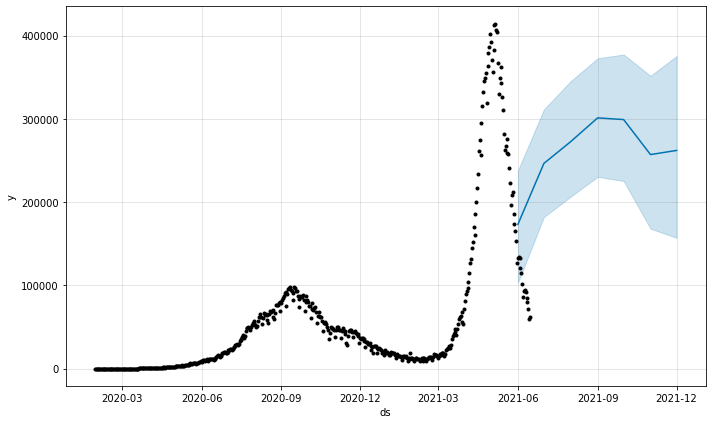

In [20]:
# plot forecast
from matplotlib import pyplot
model.plot(forecast)
pyplot.show()

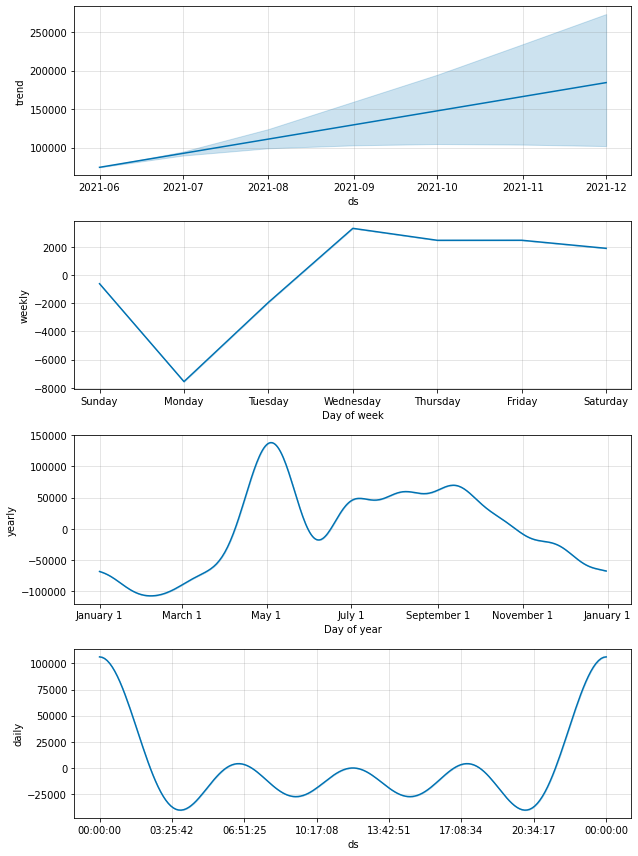

In [21]:
plot=model.plot_components(forecast)

The above visualizations shows us expected daily, weekly and yearly trends

Conclusion:

1.India might see a third wave but not as sharp and hard as the second one.

2.To avoid third wave we all should follow all necessary precautions and keep safe.